In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load stock price data (replace 'your_stock_data.csv' with your actual data file)
data = pd.read_csv('google.csv')

# Assuming your data has a 'Date' column and a 'Close' column
dates = pd.to_datetime(data['date'])
prices = data['close']

# Create a lag feature for the target variable (next day's price)
target = prices.shift(-1)

# Drop the last row with missing target value
data = pd.concat([prices, target], axis=1).dropna()
data.columns = ['close', 'next_day_close']

# Split the data into train and test sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Apply scaling to the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Fit ARIMA model
p = 1  # Autoregressive order
d = 2  # Differencing order
q = 5  # Moving average order
model = ARIMA(train_data_scaled[:, 0], order=(p, d, q))  # Use only the 'close' column
model_fit = model.fit()

# Forecast future stock prices
forecast_steps = len(test_data)
forecast_scaled = model_fit.forecast(steps=forecast_steps)

# Inverse scale the forecasted data
forecast = scaler.inverse_transform(np.column_stack((forecast_scaled, test_data_scaled[:, 1])))

# Calculate RMSE, MAE, and R-squared
rmse = np.sqrt(mean_squared_error(test_data['next_day_close'], forecast[:, 0]))
mae = mean_absolute_error(test_data['next_day_close'], forecast[:, 0])
r_squared = r2_score(test_data['next_day_close'], forecast[:, 0])

print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared:', r_squared)


Root Mean Squared Error (RMSE): 188.10761814472997
Mean Absolute Error (MAE): 140.1153568656703
R-squared: 0.6636607463361539


C:\Users\Gifty Aiyegbeni\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


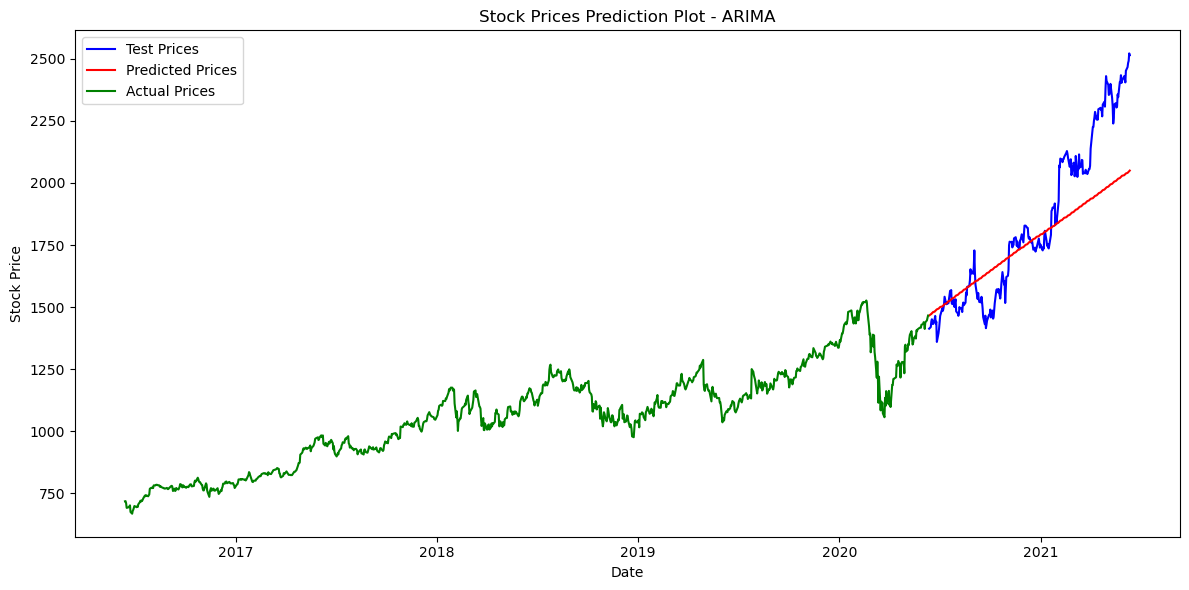

In [47]:
# Plot actual, test, and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(dates[train_size+1:], test_data['next_day_close'], label='Test Prices', color='blue')
plt.plot(dates[train_size+1:], forecast[:, 0], label='Predicted Prices', color='red')
plt.plot(dates[:train_size], train_data['close'], label='Actual Prices', color='green')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Prices Prediction Plot - ARIMA')
plt.legend()
plt.tight_layout()
plt.show()